# Spectrograms:
    
For complex time series with a wide spectral range - such as sound samples - or very long time series
scientists use spectral analysis tools. Here is an illustration how you can apply the Scipy package
to import and export sounds in WAV format (it is an old-fashioned sound format, there are tools available to convert between MP3/OGG etc sound formats and WAV formats).




In [ ]:
from scipy.stats.distributions import norm
from scipy.io.wavfile import read,write
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import numpy as np

# supporting functio to generate a sound

def note(freq, nsize, amp=1, rate=44100):
    """creates a sound with pure-sine wave
    Input parameter:
        freq  (int): frequency of the sine wave
        nsize (int): number of sample points
        amp   (int): amplitude of the wave (volume of the sound)
        rate  (int): sampling rate in Hz (for WAV formats 44100, or 22050)
    Returns:
        numpy array with samples (values of dtype int16)
    """
    t = np.linspace(0,nsize/rate,nsize)
    print (nsize)
    print (freq[0],freq[-1:])
    print (t[0],t[1],t[-1:])
    print (len(t))
    print (np.max(t))
    data = np.sin(2*np.pi*freq*t)*amp
    return data.astype(np.int16) # two byte integers

## Loading a sound from a WAV file


In [10]:
# sound from http://soundbible.com
rate,data = read('../data/white_throated_sparrow.wav') # reading
# checking the returned data types
print(type(rate),type(data))


# rate is the sampling frequency (samples per second)
channel=0
signal=data[:,channel]
nsize=len(data[:,channel])
#nuse=np.int(nsize/8.)

timelen=len(signal)/(rate*1.0)
print (f"length of the recorded sound signal {timelen :12.4f} sec")
time=np.linspace(0,timelen,nsize)


<class 'int'> <class 'numpy.ndarray'>
length of the recorded sound signal       3.1463 sec


## This code cell generates a synthetic sound example

Set the line #1 to _if True_ to run this code and to use this sound example for the spectral analysis.

Set the line #1 to _if False_ to skip this cell => spectral analysis of the WAV file data is done.


In [12]:
if False:
    # create a sound for spectral analysis
    neffect=20
    nhelp=nsize/neffect
    # no muting
    echoeffect=1.0#np.cos(np.pi/nhelp*np.arange(0,nsize)-np.pi/2.)**2
    #echoeffect=(echoeffect+1)/2.0
    #echoeffect=np.where(echoeffect>0,1,0.1) # make sure we have same length 

    freq=np.linspace(4400,2200,nsize)
    volume=np.exp(np.linspace(0,-6,nsize)) # decalying amplitude
    signal=data[0:nsize,0] # make the sound similar in volume to the WAV file sound
    # use a simple sine sound for illustration    
    amp=np.sqrt(2)*np.std(signal)*volume*echoeffect
    tone=note(freq,nsize,amp=amp,rate=rate)
    signal=tone#+norm.rvs(scale=amp,size=len(signal))
    write('../data/sound.wav',rate,signal)

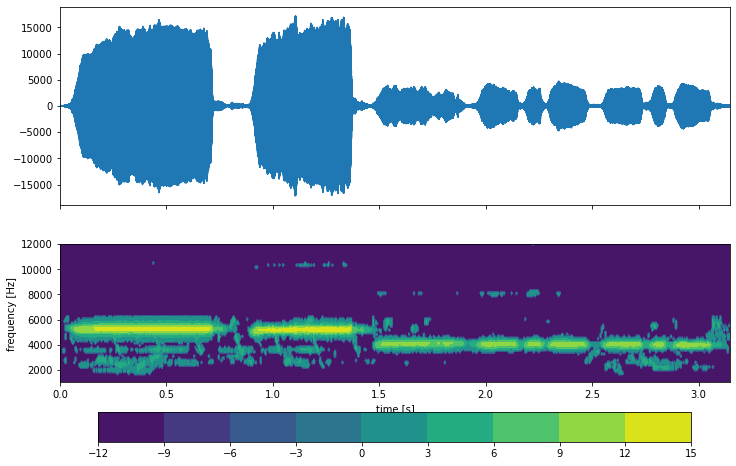

In [13]:
fig,ax=plt.subplots(2,1,sharex=True,figsize=[12,8])
ax[0].plot(time,signal)
# NFFT is the number of data points used in each block for the FFT
# and noverlap is the number of points of overlap between blocks
power,f,t,im=ax[1].specgram(signal, Fs=rate, NFFT=256, noverlap=0) # small window
xx,yy=np.meshgrid(t,f)
cs=ax[1].contourf(xx,yy,np.where(np.log(power)>0,np.log(power),-10))
ax[1].set_ylim([1000,12000])
ax[1].set_xlabel("time [s]")
ax[1].set_ylabel("frequency [Hz]")
plt.colorbar(cs,orientation='horizontal')
plt.show()

The spectrogram shows the 'power' (how domninat the frequency is in the sound) as a function of time (x-axis).
Left is the beginning of the sound signal, right is the end of the sound signal. The signal is a few seconds long.
The y-axis is showing the frequency range from 2000Hz to 12000Hz in this case. Higher frequency is to the top, lower frequency is to the bottom of the graph.

### References:
    
- Machine Learning for automatic identification of birds by song
[link to youtube video](https://youtu.be/pzmdOETnhI0)